In [2]:
import tensorflow as tf

In [48]:
from tensorflow.keras import datasets,layers,models

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [51]:
x_test.shape

(10000, 32, 32, 3)

In [52]:
y_train.shape

(50000, 1)

In [53]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [54]:
y_train=y_train.reshape(-1,)
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [55]:
y_test.shape

(10000, 1)

In [56]:
y_test[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [57]:
y_test=y_test.reshape(-1,)
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

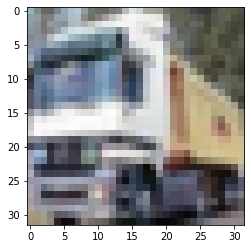

In [58]:
plt.imshow(x_train[1])

In [59]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [60]:
def plot(x,y,index):
    plt.figure(figsize=(20,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

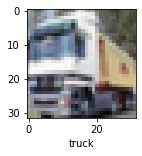

In [61]:
plot(x_train,y_train,1)

In [16]:
x_train=x_train/255
x_test=x_test/255

In [17]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [18]:
ann = models.Sequential([ layers.Flatten(input_shape=(32,32,3)), 
                         layers.Dense(3000, activation='relu'), 
                         layers.Dense(1000, activation='relu'), 
                         layers.Dense(10, activation='softmax') ]) 

In [19]:
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 106s 65ms/step - loss: 1.8143 - accuracy: 0.3543
Epoch 2/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6250 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5421 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4817 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4330 - accuracy: 0.4944


In [62]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.29      0.42      1000
           1       0.57      0.65      0.61      1000
           2       0.31      0.54      0.39      1000
           3       0.41      0.22      0.29      1000
           4       0.55      0.23      0.33      1000
           5       0.46      0.28      0.35      1000
           6       0.57      0.45      0.50      1000
           7       0.50      0.62      0.56      1000
           8       0.38      0.84      0.52      1000
           9       0.55      0.48      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [63]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [64]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [66]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 186s 64ms/step - loss: 1.4521 - accuracy: 0.4796
Epoch 2/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1137 - accuracy: 0.6086
Epoch 3/5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9891 - accuracy: 0.6551
Epoch 4/5
1563/1563 [==============================] - 38s 25ms/step - loss: 0.9101 - accuracy: 0.6819
Epoch 5/5
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8515 - accuracy: 0.7052


In [68]:
cnn.evaluate(x_test,y_test)


313/313 [==============================] - 10s 7ms/step - loss: 0.9328 - accuracy: 0.6728


[0.932791531085968, 0.6728000044822693]

In [72]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.1478590e-03, 1.7701690e-03, 5.0730291e-03, 8.8873512e-01,
        1.1153870e-03, 5.4398313e-02, 1.0720544e-02, 3.0076932e-04,
        3.4975536e-02, 7.6321652e-04],
       [6.5534022e-03, 1.6337594e-02, 1.5078791e-04, 9.2673554e-06,
        1.8778138e-06, 1.7928146e-07, 2.3426537e-06, 1.1307739e-06,
        9.7448981e-01, 2.4536254e-03],
       [3.6518969e-02, 9.1545664e-02, 3.1013039e-03, 5.4768659e-03,
        1.9026747e-03, 6.3306489e-04, 5.6358339e-04, 6.8769226e-04,
        8.2794958e-01, 3.1620573e-02],
       [3.5821062e-01, 8.1440181e-02, 3.1286854e-02, 3.1490466e-03,
        2.9700734e-03, 1.7279410e-04, 7.8776488e-03, 2.8429399e-03,
        5.1022345e-01, 1.8263396e-03],
       [1.7098575e-04, 8.1400760e-04, 2.7485481e-02, 4.2632934e-02,
        5.7448983e-01, 6.6653425e-03, 3.4724110e-01, 2.0470376e-04,
        2.1419578e-04, 8.1402424e-05]], dtype=float32)

In [73]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [74]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

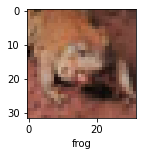

In [80]:
plot_sample(x_test, y_test,5)


In [4]:
mobile=tf.keras.applications.mobilenet.MobileNet()#pre trained algorithms avail

In [5]:
mobile=tf.keras.applications.mobilenet_v2.MobileNetV2()

In [ ]:
anyone=tf.keras.applications.#press tab to see many algorithms

In [6]:
filename="C:\Users\admin\Pictures/ambulance.jpg"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_5728/70290277.py, line 1)

In [38]:
from tensorflow.keras.preprocessing import image
img=image.load_img(filename,target_size=(224,224))

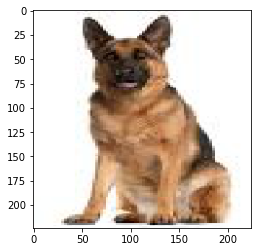

In [39]:
plt.imshow(img) 

In [40]:
resized_img=image.img_to_array(img)
final_img=np.expand_dims(resized_img,axis=0)#4th dim
final_img=tf.keras.applications.mobilenet.preprocess_input(final_img)

In [41]:
resized_img.shape

(224, 224, 3)

In [42]:
final_img.shape

(1, 224, 224, 3)

In [43]:
predictions=mobile.predict(final_img)

In [44]:
from tensorflow.keras.applications import imagenet_utils

In [45]:
result=imagenet_utils.decode_predictions(predictions)

In [46]:
result

[[('n02106662', 'German_shepherd', 0.82936525),
  ('n02105162', 'malinois', 0.037905693),
  ('n02111129', 'Leonberg', 0.016066307),
  ('n02105251', 'briard', 0.0109224515),
  ('n02112706', 'Brabancon_griffon', 0.008813232)]]